In [87]:
import urllib.request, json 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
os.getcwd()

'C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\리뷰들'

In [18]:
url_go = urllib.request.urlopen('http://api.edmunds.com/api/vehicle/v2/hyundai?fmt=json&api_key=amngfcrcpt6bcqn84kgxu6s2&state=new&view=full')
make_data = json.loads(url_go.read())
make_data = pd.DataFrame(make_data)

In [21]:
pd.DataFrame(make_data['models'])

,models
0,"{'id': 'Hyundai_Accent', 'name': 'Accent', 'ni..."
1,"{'id': 'Hyundai_Azera', 'name': 'Azera', 'nice..."
2,"{'id': 'Hyundai_Elantra', 'name': 'Elantra', '..."
3,"{'id': 'Hyundai_Elantra_GT', 'name': 'Elantra ..."
4,"{'id': 'Hyundai_Equus', 'name': 'Equus', 'nice..."
5,"{'id': 'Hyundai_Genesis', 'name': 'Genesis', '..."
6,"{'id': 'Hyundai_Genesis_Coupe', 'name': 'Genes..."
7,"{'id': 'Hyundai_Ioniq_Electric', 'name': 'Ioni..."
8,"{'id': 'Hyundai_Ioniq_Hybrid', 'name': 'Ioniq ..."
9,"{'id': 'Hyundai_Santa_Fe', 'name': 'Santa Fe',..."


In [2]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\리뷰들')

In [3]:
merge_dummy = pd.DataFrame(np.arange(1).reshape(1,1))

In [61]:
make_name = 'hyundai'
model_name = 'azera'
year = 2016
url = urllib.request.urlopen("https://api.edmunds.com/api/vehiclereviews/v2/"+make_name+"/"+model_name+"/"+str(year)+"?fmt=json&api_key=gy72r6dacnxxqmkzrqbd84t5&pagesize=100")
review_data = json.loads(url.read())
df_review_data = pd.DataFrame.from_dict(review_data['reviews'])
df_review_data['make_name'] = make_name
df_review_data['model_name'] = model_name
df_review_data['year_dummy'] = year
merge_review = pd.concat([merge_dummy, df_review_data])
merge_dummy = merge_review

In [62]:
len(merge_review['model_name'])

398

In [47]:
merge_dummy.index = [length for length in range(len(merge_dummy))]
merge_dummy = merge_dummy.drop(0)
merge_dummy = merge_dummy.drop([0],axis=1)
merge_dummy.shape

(384, 28)

In [65]:
hyundai_rating = merge_dummy.groupby(merge_dummy['model_name'])['averageRating'].mean()
hyundai_rating

model_name
accent            4.090909
azera             4.933333
elantra           4.414894
elantra-gt        4.090909
santa-fe          4.518519
santa-fe-sport    4.310345
sonata            4.484848
tucson            3.034483
Name: averageRating, dtype: float64

In [63]:
merge_dummy['averageRating'] = merge_dummy['averageRating'].apply(int)

In [81]:
review_count= merge_dummy.groupby(merge_dummy['model_name'])['author'].count()

In [90]:
hyundai_rating_table = pd.concat([hyundai_rating, review_count],axis=1)
hyundai_rating_table = hyundai_rating_table.reset_index()
hyundai_rating_table

,model_name,averageRating,author
0,accent,4.090909,11
1,azera,4.933333,15
2,elantra,4.414894,94
3,elantra-gt,4.090909,11
4,santa-fe,4.518519,27
5,santa-fe-sport,4.310345,58
6,sonata,4.484848,66
7,tucson,3.034483,116


In [95]:
hyundai_rating_table.to_csv('hyundai_rating.csv')
hyundai_rating_table.to_json('hyundai_rating.json')

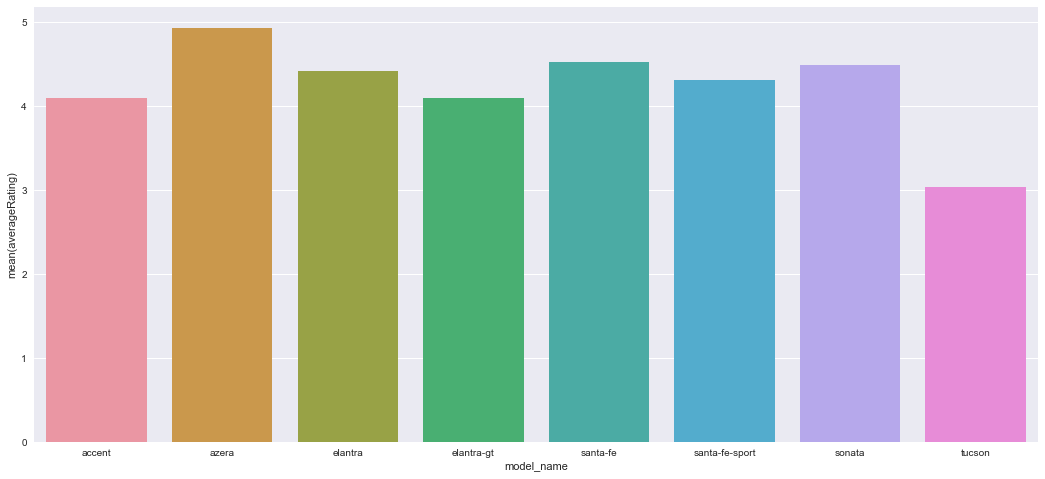

In [94]:
fig1, ax1 = plt.subplots(1, figsize=(18,8))
sns.barplot(data=hyundai_rating_table, x='model_name', y='averageRating')